<a href="https://colab.research.google.com/github/KimNamHo2020/OpenCV-ss/blob/main/4CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 히스토그램 계산, 이미지 이진화, 그리고 적응 임계값 계산을 수행하는 과정입니다. **


*  이미지의 밝기 조건에 따라 적응적으로 이진화를 수행.
*  히스토그램 기반 분석을 통해 이미지 데이터의 분포를 확인.




In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


(256, 256)


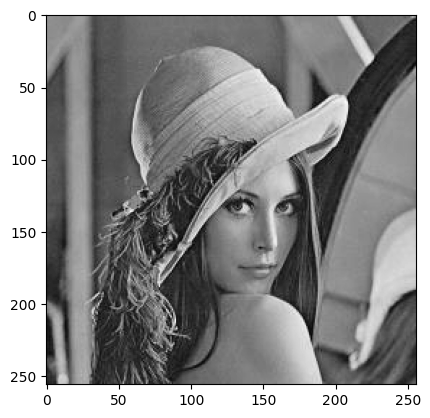

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

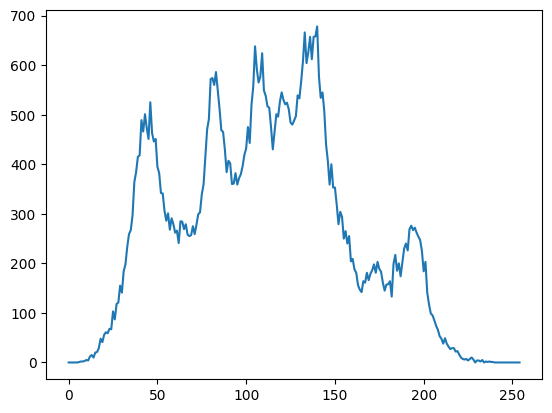

In [ ]:
hist=cv2.calcHist([gImg1],[0],None,[255],[0,255])
plt.plot(hist)


(256, 256)


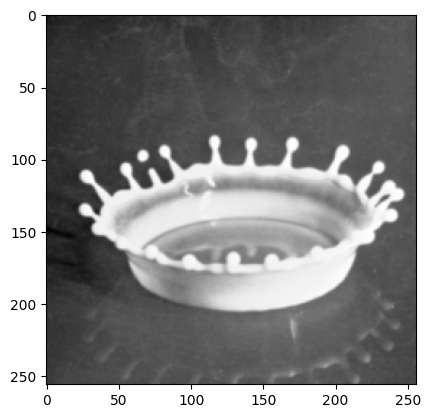

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/milkdrop.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

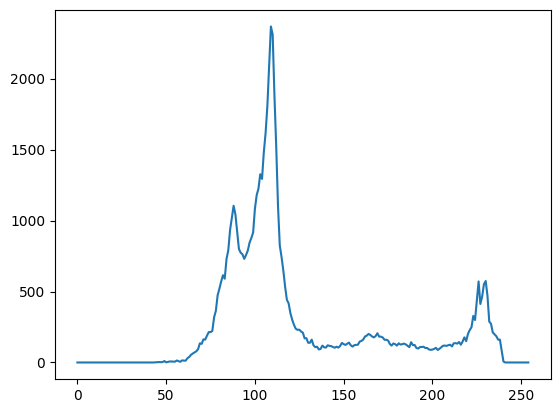

In [ ]:
hist=cv2.calcHist([gImg1],[0],None,[255],[0,255])
plt.plot(hist)


In [ ]:
gBin = np.zeros((gImg1.shape[0],gImg1.shape[1]))

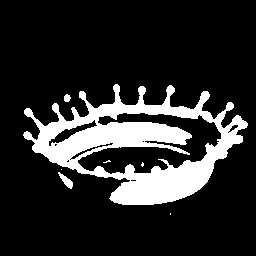

In [ ]:
T=180
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w]>T:
      gBin[h,w]=255
    else:
      gBin[h,w]=0

cv2_imshow(gBin)

In [ ]:
T1 = 50
T2 = 0
T0 = 1

outImg = np.zeros((gImg1.shape[0],gImg1.shape[1]))

In [ ]:
def threshold_update(h,w,img,output,T1):
  sum1 = 0
  count1= 1
  sum2 = 0
  count2= 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if (output[h,w]==255):
        sum1 = sum1+img[h,w]
        count1 = count1+1
      else:
        sum2 = sum2+img[h,w]
        count2 = count2+1

  avg1= sum1 / count1
  avg2 = sum2 /count2

  T2= np.int32(avg1+avg2)/2
  return T2

In [ ]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h,w]>T1:
      outImg[h,w]=255
    else:
      outImg[h,w]=0

**이미지의 지역적(mean-based) 이진화를 수행하는 과정을 구현한 것입니다.**


*   이미지 분할: 이미지를 18 x 18 블록으로 나눠 각 블록의 평균 밝기 계산.
*   평균 기반 이진화: 각 픽셀 값을 해당 블록의 평균값과 비교하여 이진화 수행.
*   남는 픽셀 처리: 이미지 크기가 블록 수로 나누어떨어지지 않는 경우,남는 픽셀 무시     
                   



(360, 360)


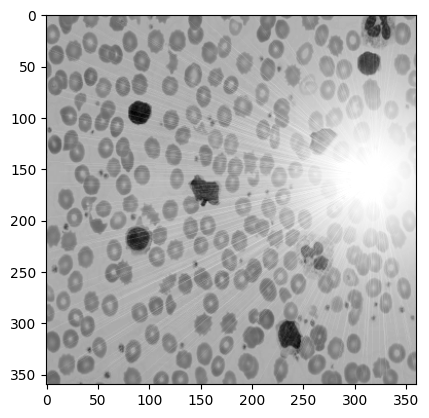

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/Copy of cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

In [ ]:
N = 18

dimh = np.int32(gImg.shape[0] / N)
dimw = np.int32(gImg.shape[1] / N)

dh_rest = np.int32(gImg.shape[0] % N)
dw_rest = np.int32(gImg.shape[1] % N)

meanImg = np.zeros((N,N))
outImg = np.zeros((gImg.shape[0],gImg.shape[1]))

In [ ]:
def mean_function(img,dimh,dimw,h,w):
  count = 1
  sum = 0
  avg = 0
  for y in range(h,h+dimh):
    for x in range(w,w+dimw):
      sum += img[y,x]
      count += 1
  avg = np.int32(sum/count)
  return avg


In [ ]:
for h in range(0,gImg.shape[0]-dh_rest,dimh):
  for w in range(0,gImg.shape[1]-dw_rest,dimw):
    meanImg[np.int32(h/dimh),np.int32(w/dimw)]=mean_function(gImg,dimh,dimw,h,w)

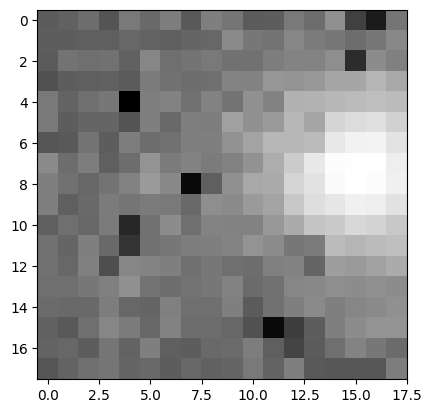

In [ ]:
plt.imshow(meanImg, cmap='gray')

In [ ]:
for h in range(0,gImg.shape[0]-dh_rest):
  for w in range(0,gImg.shape[1]-dw_rest):
    if(gImg[h,w] > meanImg[np.int32(h/dimh),np.int32(w/dimw)]):
      outImg[h,w] = 255
    else:
      outImg[h,w] = 0


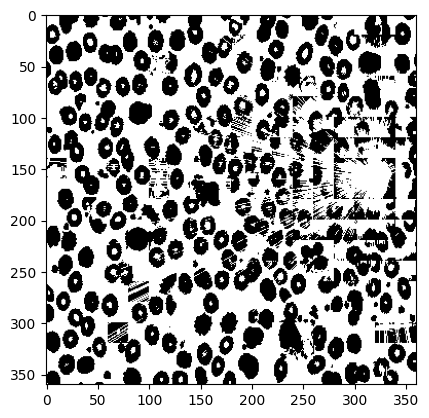

In [ ]:
plt.imshow(outImg, cmap='gray')

히스토그램 계산, 누적 히스토그램 생성 그리고 히스토그램 평활화를 수행하는 과정을 보여줍니다

*   히스토그램 분석: 원본 이미지의 픽셀 값 분포를 분석하고 시각화.
*   히스토그램 평활화: 대조를 높이기 위해 픽셀 값을 재분배하여 평활화된 이미지를 생성
*   누적 히스토그램: 원본 및 평활화된 이미지의 누적 분포를 계산.
*   정규화 및 변환: 누적 히스토그램을 정규화하고 0~255 범위로 확장하여 픽셀 값을 매핑.





(256, 256)


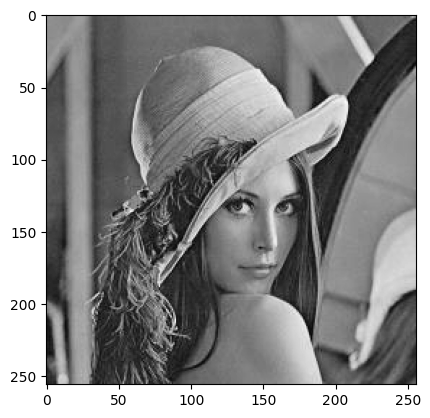

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/디지털영상처리/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

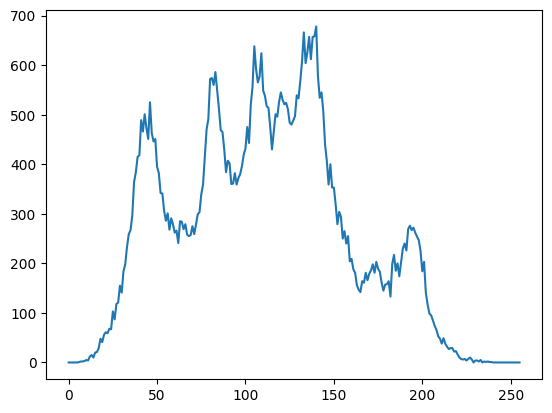

In [ ]:
hist =cv2.calcHist([gImg],[0],None,[256],[0,256])
plt.plot(hist)


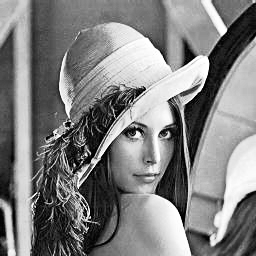

In [ ]:
gOut =cv2.equalizeHist(gImg)
cv2_imshow(gOut)

(256, 1)


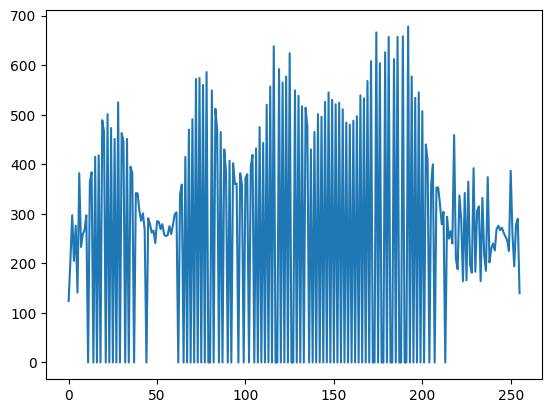

In [ ]:
hist =cv2.calcHist([gOut],[0],None,[256],[0,256])
plt.plot(hist)
print(hist.shape)

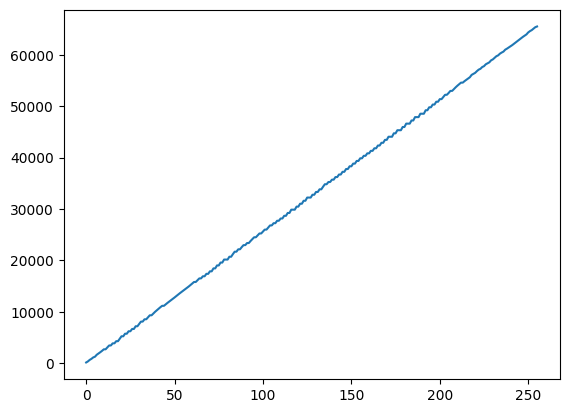

In [ ]:
cumulHist = hist.copy()
for i in range(1,256):
    cumulHist[i] = cumulHist[i-1]+hist[i]
plt.plot(cumulHist)

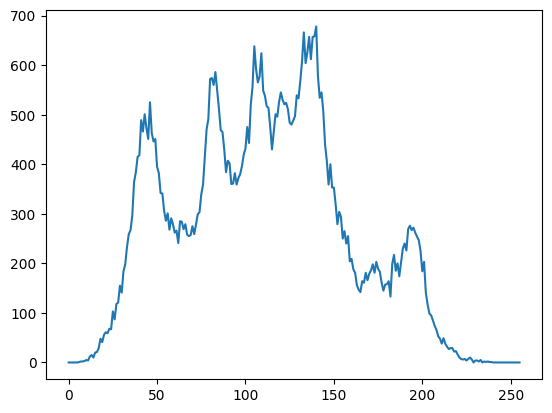

In [ ]:
hist =cv2.calcHist([gImg],[0],None,[256],[0,256])
plt.plot(hist)

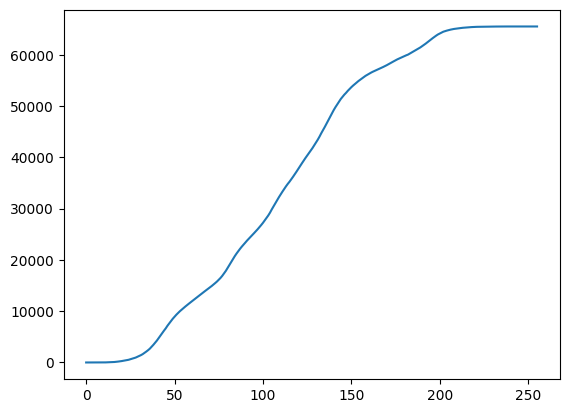

In [ ]:
cumulHist = hist.copy()
for i in range(1,256):
    cumulHist[i] = cumulHist[i-1]+ hist[i]
plt.plot(cumulHist)

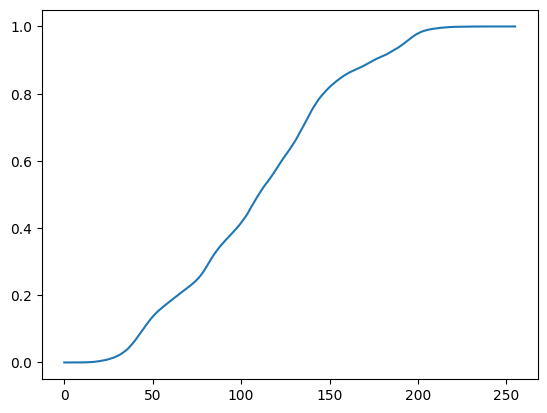

In [ ]:
equalHist =cumulHist.copy()
numOfpixels = np.int32(gImg.shape[0]*gImg.shape[1])
equalHist = equalHist/numOfpixels
plt.plot(equalHist)

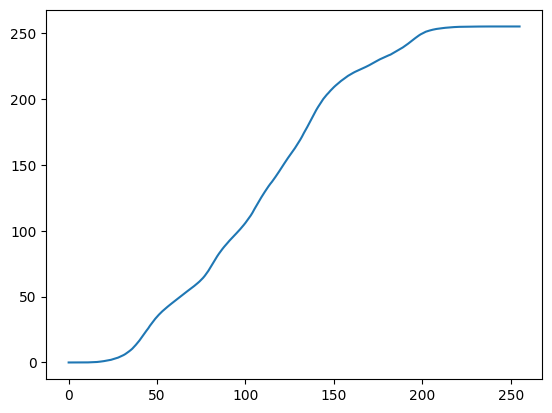

In [ ]:
equalHist = equalHist *255
plt.plot(equalHist)